This notebook will give a quick overview of using the new Overture Maps Python library with Lonboard.

We'll pass in a bounding box covering New York City and the Overture Python API will fetch only the data inside that bounding box. While Overture's buildings dataset contains 2.3 billion rows, by using a relatively small bounding box, we can download data for our query relatively quickly (around 30 seconds on my internet connection).

This uses the latest advancements of the GeoParquet specification. Data is fetched directly from the cloud with no server in the middle!

You can view a hosted version of this notebook on Notebook Sharing Space (26MB download).


In [1]:
# imports

import numpy as np
import overturemaps
from matplotlib.colors import LogNorm
from palettable.colorbrewer.sequential import Oranges_9

from lonboard import Map, PolygonLayer
from lonboard.colormap import apply_continuous_cmap

In [8]:
bbox = -71.068, 42.353, -71.058, 42.363

In [9]:
table = overturemaps.record_batch_reader("building", bbox).read_all()

# Temporarily required as of Lonboard 0.8 to avoid a Lonboard bug
table = table.combine_chunks()

In [10]:
table_df = table.to_pandas()
table_df.head()

,id,geometry,bbox,version,sources,subtype,class,names,level,has_parts,...,min_height,min_floor,facade_color,facade_material,roof_material,roof_shape,roof_direction,roof_orientation,roof_color,roof_height
0,08b2a30663865fff0200d10759af600b,b'\x00\x00\x00\x00\x03\x00\x00\x00\x01\x00\x00...,"{'xmin': -71.06746673583984, 'xmax': -71.06742...",0,"[{'property': '', 'dataset': 'OpenStreetMap', ...",outbuilding,shed,None,NaN,False,...,NaN,NaN,None,wood,None,None,NaN,None,black,NaN
1,08b2a3066386cfff0200a7789900f307,b'\x00\x00\x00\x00\x03\x00\x00\x00\x01\x00\x00...,"{'xmin': -71.06709289550781, 'xmax': -71.06700...",0,"[{'property': '', 'dataset': 'OpenStreetMap', ...",service,service,None,NaN,False,...,NaN,NaN,None,brick,None,None,NaN,None,None,NaN
2,08b2a3066394afff02005cd65f21d426,b'\x00\x00\x00\x00\x03\x00\x00\x00\x01\x00\x00...,"{'xmin': -71.06723022460938, 'xmax': -71.06719...",0,"[{'property': '', 'dataset': 'OpenStreetMap', ...",outbuilding,shed,None,NaN,False,...,NaN,NaN,None,wood,None,None,NaN,None,black,NaN
3,08b2a3066394efff0200f13264df7784,b'\x00\x00\x00\x00\x03\x00\x00\x00\x01\x00\x00...,"{'xmin': -71.06703186035156, 'xmax': -71.06690...",0,"[{'property': '', 'dataset': 'OpenStreetMap', ...",transportation,parking,"{'primary': 'Boston Common Parking Garage', 'c...",NaN,False,...,NaN,NaN,None,None,None,pyramidal,NaN,None,None,NaN
4,08b2a30663948fff02009e209407ebe8,"b""\x00\x00\x00\x00\x03\x00\x00\x00\x01\x00\x00...","{'xmin': -71.06648254394531, 'xmax': -71.06636...",0,"[{'property': '', 'dataset': 'OpenStreetMap', ...",commercial,None,"{'primary': 'Earl of Sandwich', 'common': None...",NaN,False,...,NaN,NaN,None,None,None,None,NaN,None,None,NaN


In [11]:
table_df['geometry'].dtype

dtype('O')

In [31]:
import geopandas as gpd
gdf: gpd.GeoDataFrame = gpd.GeoDataFrame.from_arrow(table=table, geometry='geometry')

gdf.head()

,id,geometry,bbox,version,sources,subtype,class,names,level,has_parts,...,min_height,min_floor,facade_color,facade_material,roof_material,roof_shape,roof_direction,roof_orientation,roof_color,roof_height
0,08b2a30663865fff0200d10759af600b,"POLYGON ((-71.06744 42.35357, -71.06743 42.353...","{'xmin': -71.06746673583984, 'xmax': -71.06742...",0,"[{'property': '', 'dataset': 'OpenStreetMap', ...",outbuilding,shed,None,NaN,False,...,NaN,NaN,None,wood,None,None,NaN,None,black,NaN
1,08b2a3066386cfff0200a7789900f307,"POLYGON ((-71.06709 42.3531, -71.06706 42.3530...","{'xmin': -71.06709289550781, 'xmax': -71.06700...",0,"[{'property': '', 'dataset': 'OpenStreetMap', ...",service,service,None,NaN,False,...,NaN,NaN,None,brick,None,None,NaN,None,None,NaN
2,08b2a3066394afff02005cd65f21d426,"POLYGON ((-71.06723 42.3546, -71.06722 42.3545...","{'xmin': -71.06723022460938, 'xmax': -71.06719...",0,"[{'property': '', 'dataset': 'OpenStreetMap', ...",outbuilding,shed,None,NaN,False,...,NaN,NaN,None,wood,None,None,NaN,None,black,NaN
3,08b2a3066394efff0200f13264df7784,"POLYGON ((-71.06693 42.35488, -71.06697 42.354...","{'xmin': -71.06703186035156, 'xmax': -71.06690...",0,"[{'property': '', 'dataset': 'OpenStreetMap', ...",transportation,parking,"{'primary': 'Boston Common Parking Garage', 'c...",NaN,False,...,NaN,NaN,None,None,None,pyramidal,NaN,None,None,NaN
4,08b2a30663948fff02009e209407ebe8,"POLYGON ((-71.0664 42.35434, -71.06643 42.3543...","{'xmin': -71.06648254394531, 'xmax': -71.06636...",0,"[{'property': '', 'dataset': 'OpenStreetMap', ...",commercial,None,"{'primary': 'Earl of Sandwich', 'common': None...",NaN,False,...,NaN,NaN,None,None,None,None,NaN,None,None,NaN


In [32]:
type(gdf.crs)

NoneType

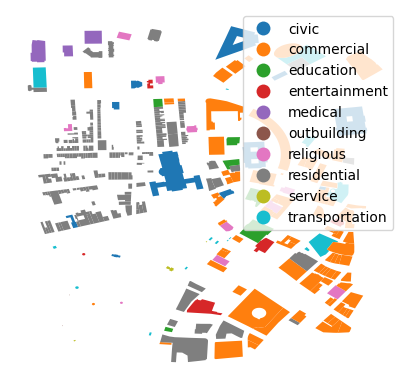

In [17]:
gdf.plot(column="subtype", legend=True).set_axis_off()

In [34]:
gdf.set_crs(crs='EPSG:4326', epsg=4326, inplace=True, allow_override=True)

,id,geometry,bbox,version,sources,subtype,class,names,level,has_parts,...,min_height,min_floor,facade_color,facade_material,roof_material,roof_shape,roof_direction,roof_orientation,roof_color,roof_height
0,08b2a30663865fff0200d10759af600b,"POLYGON ((-71.06744 42.35357, -71.06743 42.353...","{'xmin': -71.06746673583984, 'xmax': -71.06742...",0,"[{'property': '', 'dataset': 'OpenStreetMap', ...",outbuilding,shed,None,NaN,False,...,NaN,NaN,None,wood,None,None,NaN,None,black,NaN
1,08b2a3066386cfff0200a7789900f307,"POLYGON ((-71.06709 42.3531, -71.06706 42.3530...","{'xmin': -71.06709289550781, 'xmax': -71.06700...",0,"[{'property': '', 'dataset': 'OpenStreetMap', ...",service,service,None,NaN,False,...,NaN,NaN,None,brick,None,None,NaN,None,None,NaN
2,08b2a3066394afff02005cd65f21d426,"POLYGON ((-71.06723 42.3546, -71.06722 42.3545...","{'xmin': -71.06723022460938, 'xmax': -71.06719...",0,"[{'property': '', 'dataset': 'OpenStreetMap', ...",outbuilding,shed,None,NaN,False,...,NaN,NaN,None,wood,None,None,NaN,None,black,NaN
3,08b2a3066394efff0200f13264df7784,"POLYGON ((-71.06693 42.35488, -71.06697 42.354...","{'xmin': -71.06703186035156, 'xmax': -71.06690...",0,"[{'property': '', 'dataset': 'OpenStreetMap', ...",transportation,parking,"{'primary': 'Boston Common Parking Garage', 'c...",NaN,False,...,NaN,NaN,None,None,None,pyramidal,NaN,None,None,NaN
4,08b2a30663948fff02009e209407ebe8,"POLYGON ((-71.0664 42.35434, -71.06643 42.3543...","{'xmin': -71.06648254394531, 'xmax': -71.06636...",0,"[{'property': '', 'dataset': 'OpenStreetMap', ...",commercial,None,"{'primary': 'Earl of Sandwich', 'common': None...",NaN,False,...,NaN,NaN,None,None,None,None,NaN,None,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,08b2a30660350fff02003ad881fbb3c9,"POLYGON ((-71.05949 42.36153, -71.05945 42.361...","{'xmin': -71.05951690673828, 'xmax': -71.05941...",0,"[{'property': '', 'dataset': 'OpenStreetMap', ...",None,None,None,1.0,False,...,NaN,1.0,None,concrete,concrete,None,NaN,None,None,NaN
919,08b2a30660355fff02003a6f7846ec8e,"MULTIPOLYGON (((-71.05979 42.36138, -71.05973 ...","{'xmin': -71.0597915649414, 'xmax': -71.058082...",0,"[{'property': '', 'dataset': 'OpenStreetMap', ...",None,None,{'primary': 'John Fitzgerald Kennedy Federal B...,NaN,True,...,NaN,NaN,#DDDDCC,None,concrete,flat,NaN,None,None,NaN
920,08b2a30660355fff0200526e5b63f7d6,"POLYGON ((-71.05864 42.36144, -71.05864 42.361...","{'xmin': -71.05864715576172, 'xmax': -71.05853...",0,"[{'property': '', 'dataset': 'OpenStreetMap', ...",None,None,None,1.0,False,...,NaN,1.0,None,concrete,concrete,flat,NaN,None,None,NaN
921,08b2a30660346fff0200e2746e87f38f,"POLYGON ((-71.05801 42.3615, -71.0582 42.36148...","{'xmin': -71.05821228027344, 'xmax': -71.05797...",0,"[{'property': '', 'dataset': 'OpenStreetMap', ...",None,None,"{'primary': 'Congress Street Civic Space', 'co...",NaN,False,...,NaN,NaN,None,None,None,None,NaN,None,None,NaN


In [35]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [36]:
gdf.explore()

In [30]:
type(gdf.crs)

NoneType

## Error msg without s3fs
```pwsh
overturemaps download --bbox=-71.068,42.353,-71.058,42.363 -f geoparquet --type=building --output=boston.geoparquet
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\OSGeo4W\bin\apps\Python312\Scripts\overturemaps.exe\__main__.py", line 7, in <module>
  File "C:\OSGeo4W\bin\apps\Python312\Lib\site-packages\click\core.py", line 1157, in __call__
    return self.main(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\OSGeo4W\bin\apps\Python312\Lib\site-packages\click\core.py", line 1078, in main
    rv = self.invoke(ctx)
         ^^^^^^^^^^^^^^^^
  File "C:\OSGeo4W\bin\apps\Python312\Lib\site-packages\click\core.py", line 1688, in invoke
    return _process_result(sub_ctx.command.invoke(sub_ctx))
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\OSGeo4W\bin\apps\Python312\Lib\site-packages\click\core.py", line 1434, in invoke
    return ctx.invoke(self.callback, **ctx.params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\OSGeo4W\bin\apps\Python312\Lib\site-packages\click\core.py", line 783, in invoke
    return __callback(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\OSGeo4W\bin\apps\Python312\Lib\site-packages\overturemaps\cli.py", line 88, in download
    reader = record_batch_reader(type_, bbox)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\OSGeo4W\bin\apps\Python312\Lib\site-packages\overturemaps\core.py", line 35, in record_batch_reader
    path, filesystem=fs.S3FileSystem(anonymous=True, region="us-west-2")
                     ^^^^^^^^^^^^^^^
  File "C:\OSGeo4W\bin\apps\Python312\Lib\site-packages\pyarrow\fs.py", line 71, in __getattr__
    raise ImportError(
ImportError: The pyarrow installation is not built with support for 'S3FileSystem'
```

In [4]:
heights = table["height"].to_numpy()
heights = np.nan_to_num(heights, nan=1)

In [5]:
normalizer = LogNorm(1, heights.max(), clip=True)
normalized_heights = normalizer(heights)

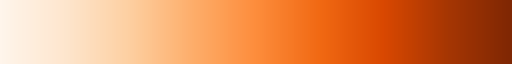

In [6]:
Oranges_9.mpl_colormap

In [7]:

colors = apply_continuous_cmap(normalized_heights, Oranges_9)

In [8]:
layer = PolygonLayer(
    # Select only a few attribute columns from the table
    table=table.select(["id", "height", "geometry", "names"]),
    extruded=True,
    get_elevation=heights,
    get_fill_color=colors,
)


C:\OSGeo4W\bin\apps\Python312\Lib\site-packages\lonboard\_geoarrow\ops\reproject.py:23: UserWarning: No CRS exists on data. If no data is shown on the map, double check that your CRS is WGS84.
  warn(


In [9]:
view_state = {
    "longitude": -73.98416810282863,
    "latitude": 40.72651721370669,
    "zoom": 12.726630492730596,
    "pitch": 59.80465353190481,
    "bearing": 13.243243243243244,
}
m = Map(layer, view_state=view_state)
m

Map(layers=[PolygonLayer(extruded=True, get_elevation=<pyarrow.lib.FloatArray object at 0x000001DAB5875060>
[
…

In [14]:
m.show_tooltip

True